# Exploratory Data Analysis of Traffic Volume Data in the US

## Data
This dataset provides hourly traffic volume for a city, including features indicating holidays and weather conditions.
The files used here span from 1st January 2013 to 31st December 2013. The data is acquired from the Minnesota Department of Transportation (www.dot.state.mn.us). The features are shown below:

Attributes:
- `holiday`: US national and regional holidays
- `temp`: average temperature in Kelvin (K)
- `rain_1h`: rain that occured in the hour (mm)
- `snow_1h`: snow that occured in the hour (mm)
- `clouds_all`: percentage of cloud cover
- `weather main`: textual description of current weather
- `weather_description`: longer textual description of current weather
- `date_time`: hour of the data collected in local time

Attribute (Output):
- `traffic_volume`: hourly I-94 reported westbound traffic volume



## Objective
We would first like to understand the understand the trend of the traffic volume across the different months in 2013 and across the different time of the day/week. We would like to what causes an increase and decrease in traffice volume: is it due to certain weather/temperature patterns or due to holiday seasons? By understanding the historical trends of traffic volume and the relationship of the traffic volume with weather/temperature/holidays, we can better identify the features used to predict the weather pattern.

Some questions we would like to investigate:
- What is the traffic volume pattern like, across the different months in 2013?
- What is the traffic volume pattern like, across the different time of the day/week?
- How is the traffic volume related to the weather?
- How is the traffic volume related to the temperature?
- How is the traffic volume related to the holiday seasons?
- Does the combination of bad weather and time of the day/week leads to high traffic volume?
- Does the combination of holiday seasons and time of the day/week leads to high traffic volume?
- Does the combination of bad weather and holiday seasons leads to high traffic volume?

## Reference
[1] Data acquired from https://aisgaiap.blob.core.windows.net/aiap5-assessment-data/traffic_data.csv

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import io
import requests


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
url="https://aisgaiap.blob.core.windows.net/aiap5-assessment-data/traffic_data.csv"
s=requests.get(url).content
dat=pd.read_csv(io.StringIO(s.decode('utf-8')))
dat.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,New Years Day,263.49,0.0,0,58,Clouds,broken clouds,2013-01-01 00:00:00,1439
1,None,263.78,0.0,0,40,Clouds,scattered clouds,2013-01-01 01:00:00,1502
2,None,264.16,0.0,0,75,Snow,heavy snow,2013-01-01 02:00:00,933
3,None,263.95,0.0,0,90,Clouds,overcast clouds,2013-01-01 03:00:00,576
4,None,263.65,0.0,0,90,Clouds,overcast clouds,2013-01-01 04:00:00,372


In [2]:
# Data processing
dat['date_time'] = pd.to_datetime(dat['date_time'])
dat['date_time'][0].year


def when_was_it(x):
    if x.hour >= 5 and x.hour < 10:
        return "Morning Rush (5-10)"
    elif x.hour >= 10 and x.hour < 15:
        return "Office Hours (10-15)"
    elif x.hour >= 15 and x.hour < 19:
        return "Afternoon Rush (15-19)"
    elif x.hour >= 19 and x.hour < 23:
        return "Evening (19-23)"
    else:
        return "Night (23-5)"


# Create a new column for categories of time
dat['Time'] = dat['date_time'].apply(when_was_it)
#dat['Time']


# Create a new column for month
def get_month(x):
    return x.month
dat['month'] = dat['date_time'].apply(get_month)


# Create a new column to convert temperature into celsius
dat['temp(celsius)'] = round(dat['temp']-273.15) 
#dat['temp(celsius)'] 

dat['day_of_week'] = dat['date_time'].dt.day_name()
#dat

Time is classified into the categories:
- Morning Rush from 5am to 10am
- Office Hours from 10am to 3pm (or: 10:00 - 15:00)
- Afternoon Rush from 3pm to 7pm (or: 15:00 - 19:00)
- Evening from 7pm to 11pm (or: 19:00 - 23:00)
- Night from 11pm to 5am (or: 23:00 - 05:00)

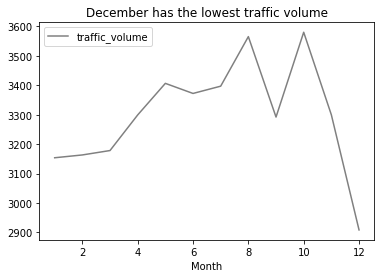

In [3]:
# Visualization of traffic volume by month
time_day_month = dat.groupby(['month']).apply(lambda x: x.sort_values(['traffic_volume'],ascending = False).mean())
time_day_bar_w_month = time_day_month.plot( x = 'month', y='traffic_volume', color = 'grey')
plt.xlabel('Month')
#plt.yticks('Traffic Volume')
plt.title('December has the lowest traffic volume')
plt.show()

Insights from analyzing Traffic Volume by months 
- December has a biggest decrease in traffic volume
- October, August, July have the largest traffic volume
- December and January are the two lowest with the lowest traffic volume. December to January see the largest increase in traffic
- Since December and January are holiday months, while October, August, July are not, this tells us that the traffic volume could be measured somewhere at the business district of a city
- Workers could be travelling / on-vaction during the holiday months hence the traffic volume is low.
- Workers are usually working during October, August, July  

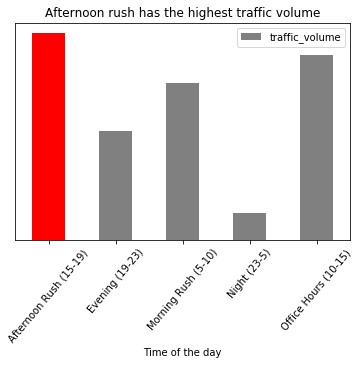

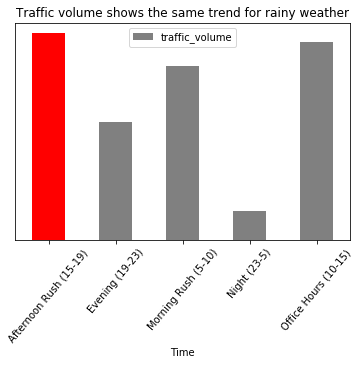

In [4]:
# Visualization for the time of the day
time_day = dat.groupby(['Time']).apply(lambda x: x.sort_values(['traffic_volume'],ascending = False).mean())
time_day_bar = time_day.plot.bar( y='traffic_volume', rot=50, color = 'grey')

highlight = "Afternoon Rush (15-19)"
pos = time_day.index.get_loc(highlight)
time_day_bar.patches[pos].set_facecolor('r')

plt.xlabel('Time of the day')
plt.yticks([])
plt.title('Afternoon rush has the highest traffic volume')
plt.show()


dat1 = dat[dat['rain_1h']>0.5]
time_day_w_rain = dat1.groupby(['Time']).apply(lambda x: x.sort_values(['traffic_volume'],ascending = False).mean())

time_day_bar_w_rain = time_day_w_rain.plot.bar( y='traffic_volume', rot=50, color = 'grey')
plt.yticks([])
plt.title('Traffic volume shows the same trend for rainy weather')

highlight = "Afternoon Rush (15-19)"
pos = time_day_w_rain.index.get_loc(highlight)
time_day_bar_w_rain.patches[pos].set_facecolor('r')
plt.show()

Insights from analyzing Traffic Volume by Time of the day 
- Afternoon Rush sees the largest traffic volume. The second largest traffic volume is during the office hours.
- Night time has the lowest traffic volume.
- The traffic volume still displays the same trend during rainy weather. 
- This tells us that the location for measuring traffic volume is unlikely to be outdoor/leisure/entertainment areas or in places where they live.
- This is because these traffic volume in these aforementioned areas will likely be different due to weather.
- Afternoon Rush has the largest traffic volume as this is when the workers are rushing for their lunch before heading back to work.
- Afternoon Rush has a higher traffic than Morning Rush as this could be due to some workers not have not have not started their work yet.

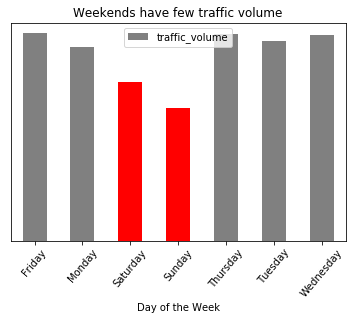

In [5]:
# Visualization for the time of the day
week_day = dat.groupby(['day_of_week']).apply(lambda x: x.sort_values(['traffic_volume'],ascending = False).mean())
week_day_bar = week_day.plot.bar( y='traffic_volume', rot=50, color = 'grey')


highlight = "Sunday"
pos = week_day.index.get_loc(highlight)
week_day_bar.patches[pos].set_facecolor('r')

highlight = "Saturday"
pos = week_day.index.get_loc(highlight)
week_day_bar.patches[pos].set_facecolor('r')

plt.xlabel('Day of the Week')
plt.yticks([])
plt.title('Weekends have few traffic volume')
plt.show()


Insights from analyzing Traffic Volume by weekday and weekend
- Weekend has a lower traffic volume compared to weekday

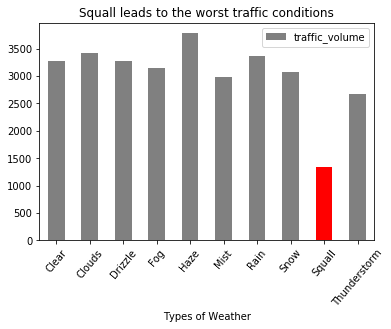

In [6]:
time_day_weather = dat.groupby(['weather_main']).apply(lambda x: x.sort_values(['traffic_volume'],ascending = False).mean())
time_day_bar_w_weather = time_day_weather.plot.bar(y='traffic_volume', rot=50, color = 'grey')
highlight = "Squall"
pos = time_day_weather.index.get_loc(highlight)
time_day_bar_w_weather.patches[pos].set_facecolor('red')
plt.xlabel('Types of Weather')
#plt.yticks('Traffic Volume')
plt.title('Squall leads to the worst traffic conditions')
plt.show()


Insights from analyzing Traffic Volume by weather conditions 
- Amongst the types of weather, haze has the smallest effect on traffic volume
- Amongst the types of weather, Squall has the largest effect on traffic volume. Followed by thunderstorms
- Surprisingly, there is an anomaly in that clear weather actually has a lower traffic volume than haze weather

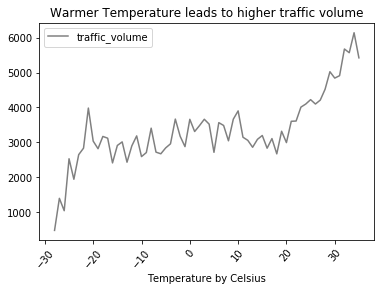

In [7]:
time_day_temp = dat.groupby(['temp(celsius)']).apply(lambda x: x.sort_values(['traffic_volume'],ascending = False).mean())
time_day_bar_w_temp = time_day_temp.plot(x = 'temp(celsius)', y='traffic_volume', rot=50, color = 'grey')
plt.xlabel('Temperature by Celsius')
#plt.yticks('Traffic Volume')
plt.title('Warmer Temperature leads to higher traffic volume')
plt.show()


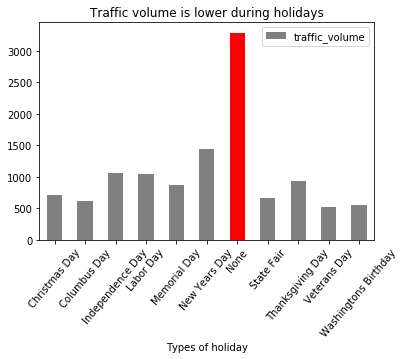

In [8]:
holiday = dat.groupby(['holiday']).apply(lambda x: x.sort_values(['traffic_volume'],ascending = False).mean())
holiday
holiday_bar = holiday.plot.bar( y='traffic_volume', rot=50, color = 'grey')

highlight = "None"
pos = holiday.index.get_loc(highlight)
holiday_bar.patches[pos].set_facecolor('r')

plt.xlabel('Types of holiday')
plt.title('Traffic volume is lower during holidays')
plt.show()


Insights from analyzing Traffic Volume by holidays
- Non-holidays leads to the highest traffic volume

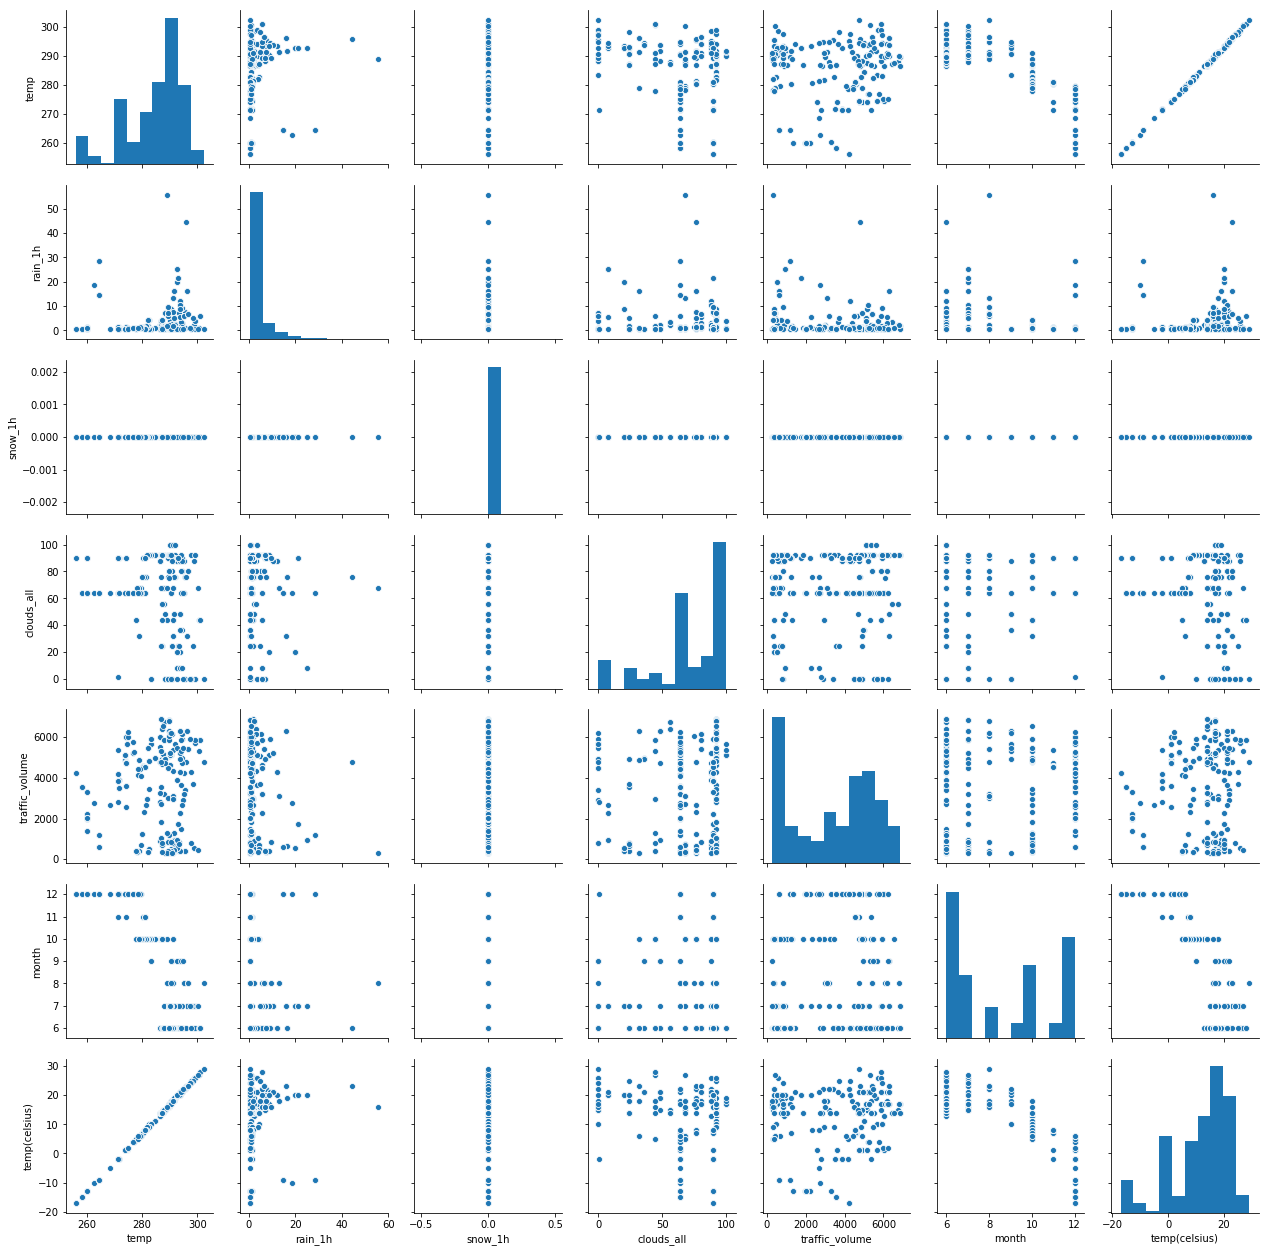

In [11]:
# Basic correlogram
sns.pairplot(dat1)


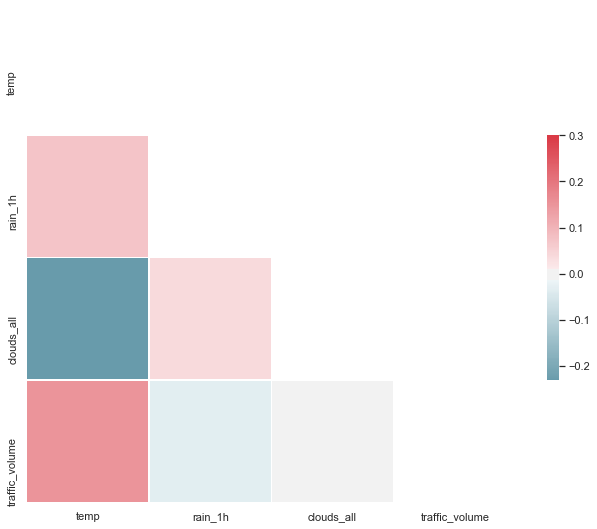

In [12]:
sns.set(style="white")
dat2 = dat[['holiday','temp','rain_1h','clouds_all','weather_main',
           'traffic_volume','Time']]
corr = dat2.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Insights generated from EDA

- The dataset for traffic volume is measured at a business district in a city.
- Holidays have a decreasing effect to traffic volume as most workers will not be working in the business district.
- Warm temperatures have an increasing effect to traffic volume as most workers will be working in the business district.
- Rainy weather does not have a strong effect towards traffic volume.
- Cloud cover has a minimal impact to traffic volume.
- Types of weather does not generally affect the traffic volume unless it is a extreme weather (e.g. squall)
- Temperature and amount of cloud has a strong correlation. 
- Holidays, Weekday/Weekend, Temperature, Raining weather, amount of cloud can all be used for training the dataset
